# Multiclass Classification of Predicting Origin of Wine using Tensorflow and Keras API

## CS 672: Introduction to Deep Learning (CRN 74071)

**Christina Hyman, Ronaldo Simbana, Yinyi Du, Mahesh Sagar Nakka**


## Introduction
**The aim of Project #1 is to perform an explanatory data analysis (EDA) on wine class classification using the classical method in addition to implementing TensorFlow Data Validation.**

**We then develop a multi-classification deep learning model to provide reliable predictions that correctly classifies the origin of wine.**


**Lastly, we performed hyperparameter tuning to choose parameters that improve the performance of the model and generalize new unseen data.**

In [1]:
!pip install tensorflow

In [2]:
!pip install tensorflow-data-validation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install apache-beam

In [4]:
!pip install graphviz

In [5]:
!pip install ucimlrepo

In [6]:
!pip install keras

In [7]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 24.4 MB/s eta 0:00:00


In [8]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import keras_tuner
from keras_tuner import GridSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend


## Part A: Explanatory Data Analysis (EDA) and Tensorflow Data Validation
* create a DataFrame from the original dataset
* rename columns
* remove missing values, duplicates, and outliers
* create visuals of relationships between features and target variable
* perform feature selection
* perform feature scaling
* apply TFDV techniques to analyze data

In [10]:
# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
features = wine.data.features
target = wine.data.targets

df = pd.concat([features, target], axis=1)

**Firstly, we define variables for the feature DataFrame and the target DataFrame. We then combine both DataFrame so that we have a DataFrame of both the features and target variables.**

In [11]:
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


**We use `df.head()` to take a quick glance of the first 5 observations.**

In [12]:
df.shape

(178, 14)

**This dataset contains 178 observations and 14 features (13 feature variables and 1 target variable).**

In [13]:
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

In [14]:
df.rename(columns={'Alcalinity_of_ash': 'Alcalinity of Ash', 'Total_phenols': 'Total Phenols',
                   'Nonflavanoid_phenols': 'Nonflavanoid Phenols', 'Color_intensity': 'Color Intensity',
                   '0D280_0D315_of_diluted_wines': 'OD of Diluted Wines','class': 'Class'},
          inplace=True)

In [15]:
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue', 'OD of Diluted Wines',
       'Proline', 'Class'],
      dtype='object')

**In cell [14], we renamed the columns so that they are more consise. In addition, class is a blueprint for creating objects in Python, so changing the name allowed us to preprocess more easily. The column names in cell [15] will be used.**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malicacid             178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity of Ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD of Diluted Wines   178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Class                 178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**All features are of numeric type.**

In [17]:
df.duplicated().sum()

0

**There are no duplicates.**

In [18]:
df.isnull().sum()

Alcohol                 0
Malicacid               0
Ash                     0
Alcalinity of Ash       0
Magnesium               0
Total Phenols           0
Flavanoids              0
Nonflavanoid Phenols    0
Proanthocyanins         0
Color Intensity         0
Hue                     0
OD of Diluted Wines     0
Proline                 0
Class                   0
dtype: int64

**There are no missing values.**

In [19]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD of Diluted Wines,Proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


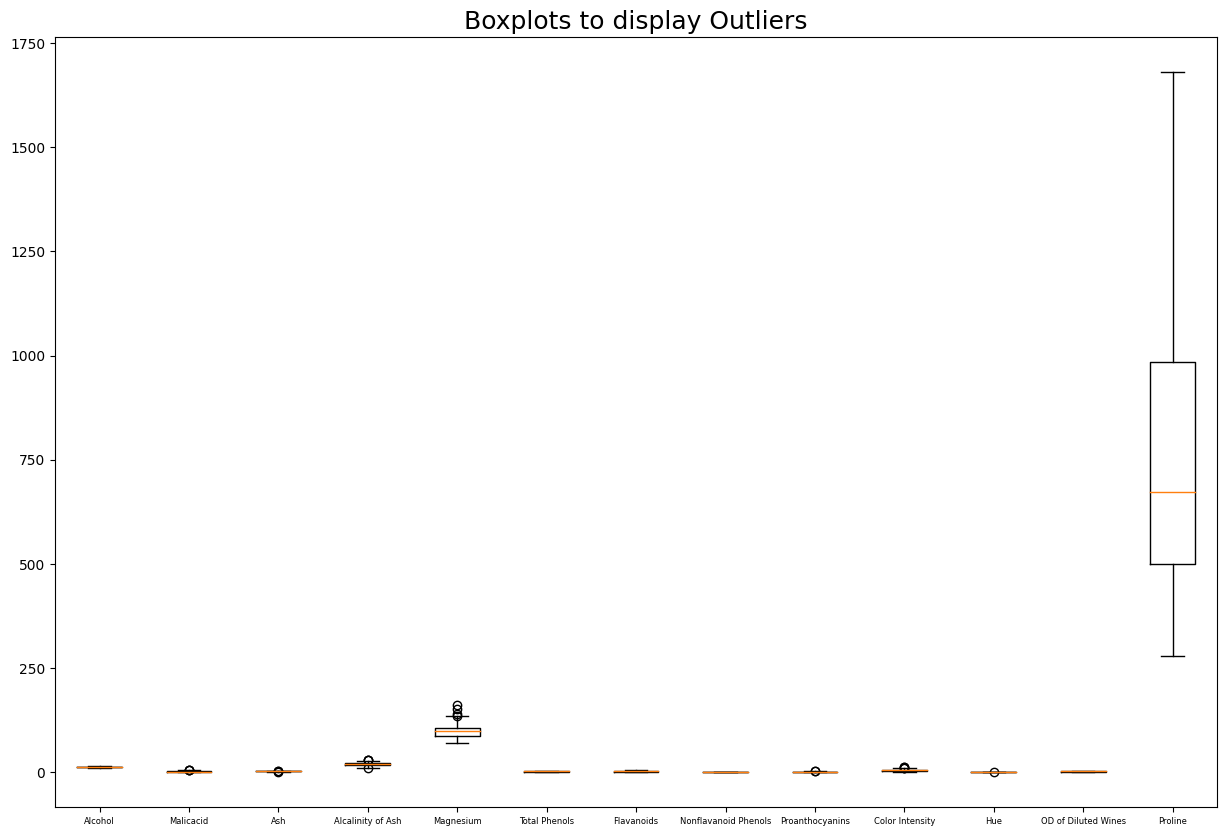

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.boxplot(df[['Alcohol', 'Malicacid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
               'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
               'Proanthocyanins', 'Color Intensity', 'Hue',
               'OD of Diluted Wines', 'Proline']])
ax.set_xticklabels(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
                   'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
                   'Proanthocyanins', 'Color Intensity', 'Hue',
                   'OD of Diluted Wines', 'Proline'])
ax.tick_params(axis='x', labelsize=6)

plt.title('Boxplots to display Outliers', fontsize=18)

plt.show()

**The boxplot from the output of cell [20] visually shows whether outliers exist in our data. The features containing the circles outside the whiskers of the boxplot represent outliers.**

**The features that contain outliers are Malicaid, Ash, Alcalinity of Ash, Magnesium, Proanthocyanins, Color Intensity, and Hue.**

In [21]:
def remove_outliers(df, cols):
    for col in cols:
        # Calculate quartiles and IQR for the column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Identify outliers using the IQR method
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = ((df[col] < lower) | (df[col] > upper))

        # replace outliers with NaN
        df[outliers] = pd.NA

    # Drop rows with NaN values
    df.dropna(inplace=True)

    return df

**In cell [21] we defined a function remove_outliers to detect and remove outliers by using the IQR method for the observations containing outliers. This returns a DataFrame with no outliers once the columns are passed through in the next cell.**

In [22]:
df = remove_outliers(df, ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue',
       'OD of Diluted Wines', 'Proline'])
df.shape

(161, 14)

**A total of 17 observations were outliers and were removed from the original DataFrame, and we are left with 161 instances.**

In [23]:
df.info()

df['Magnesium'] = df['Magnesium'].astype(int)
df['Proline'] = df['Proline'].astype(int)
df['Class'] = df['Class'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               161 non-null    float64
 1   Malicacid             161 non-null    float64
 2   Ash                   161 non-null    float64
 3   Alcalinity of Ash     161 non-null    float64
 4   Magnesium             161 non-null    float64
 5   Total Phenols         161 non-null    float64
 6   Flavanoids            161 non-null    float64
 7   Nonflavanoid Phenols  161 non-null    float64
 8   Proanthocyanins       161 non-null    float64
 9   Color Intensity       161 non-null    float64
 10  Hue                   161 non-null    float64
 11  OD of Diluted Wines   161 non-null    float64
 12  Proline               161 non-null    float64
 13  Class                 161 non-null    float64
dtypes: float64(14)
memory usage: 18.9 KB


**The function we defined for outliers assigned all data types to floats, so we assigned the features back to their original datatypes. The correction is shown below.**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               161 non-null    float64
 1   Malicacid             161 non-null    float64
 2   Ash                   161 non-null    float64
 3   Alcalinity of Ash     161 non-null    float64
 4   Magnesium             161 non-null    int64  
 5   Total Phenols         161 non-null    float64
 6   Flavanoids            161 non-null    float64
 7   Nonflavanoid Phenols  161 non-null    float64
 8   Proanthocyanins       161 non-null    float64
 9   Color Intensity       161 non-null    float64
 10  Hue                   161 non-null    float64
 11  OD of Diluted Wines   161 non-null    float64
 12  Proline               161 non-null    int64  
 13  Class                 161 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 18.9 KB


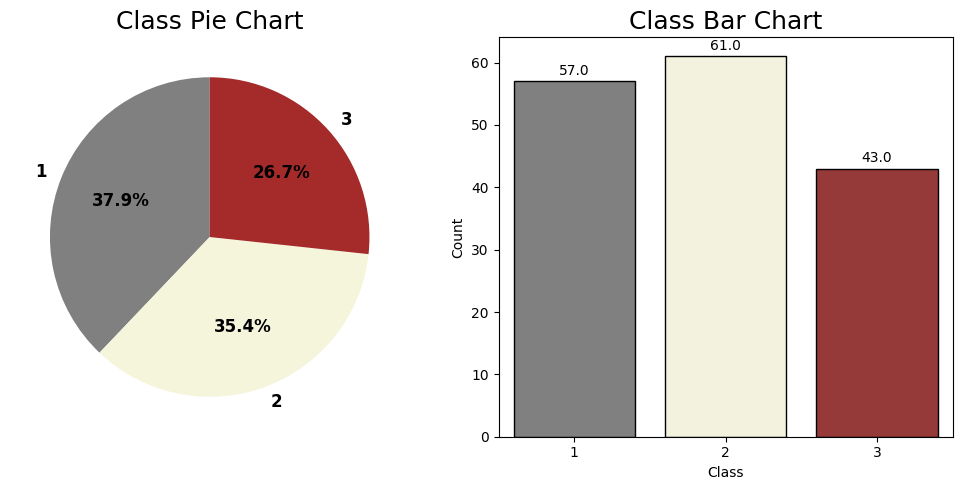

In [25]:
counts = df['Class'].value_counts()

# create a pie and bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Define data for the pie chart

labels = ['1', '2', '3']
colors = ['gray', 'beige', 'brown']

ax1.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold', 'fontsize': 12})
ax1.set_title('Class Pie Chart', fontsize=18)

ax2 = sns.countplot(x='Class', data = df ,palette = colors ,edgecolor = 'black')
ax2.set(xlabel='Class', ylabel='Count')
ax2.set_title('Class Bar Chart', fontsize=18)
for rect in ax2.patches:
    ax2.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, rect.get_height(), horizontalalignment='center')
    ax2.set_xticklabels(['1','2','3'])


plt.tight_layout()
plt.show()

**The pie chart and bar chart show the class distribution.**




*   **57 observations are labeled Class 1, which is 37.9% of the dataset**
*   **61 observations are labeled  Class 2, which is 35.4% of the dataset**
*   **43 observations are labeled  Class 3, which is 26.7% of the dataset**

**Overall, the classes of the target label are almost evenly distributed.** **There is almost no bias in the data.**

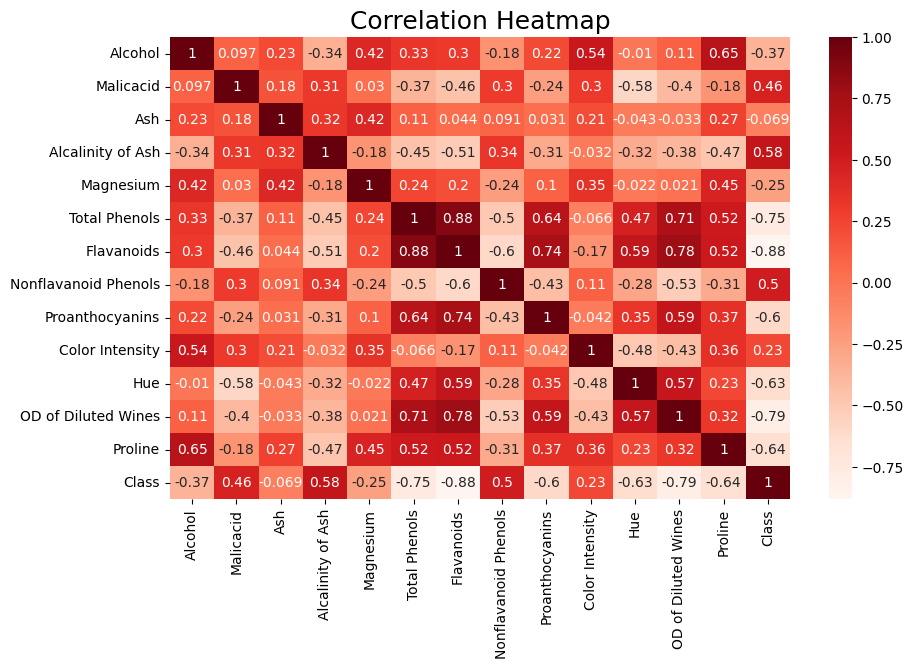

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='Reds', annot=True, annot_kws={'fontsize': 10})
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

**The heatmap above shows correlation coefficients for each feature variable against each other. The last row and the last column of the heatmap represent the correlation coefficient of each feature variable and the target variable.**

*  **Alcalinity of Ash has the strongest positive correlation with the target variable Class.**

*  **Total Phenols, Flavanoid, Optical Density of Diluted Wines are strongly negatively correlated with the Class target variable.**


In [27]:
x = df.drop('Class', axis = 1)
y = df.Class

**In cell above, we separate the data into two variables x and y to prepare the DataFrame for Feature Transformation.**

* **`x` is a df with `shape (161, 13)` storing the features**

* **`y` is a df with `shape (161, 1)` storing the target variable**


In [28]:
# Instantiate the feature selector
selector = SelectKBest(score_func=f_classif, k=6)

# Fit the selector to the data and transform the features
x_new = selector.fit_transform(x, y)

# Get the mask of selected features
mask = selector.get_support()

# Get the names of the selected columns
selected_columns = x.columns[mask]

print(selected_columns)

Index(['Alcohol', 'Total Phenols', 'Flavanoids', 'Color Intensity',
       'OD of Diluted Wines', 'Proline'],
      dtype='object')


 **In cell above, we perform feature selection by using the ANOVA F-statistic (`f_classif`) to select the top 6 features from the original dataset.**

 **It creates a boolean mask to identify the selected features and then updates the feature set x to contain only the selected features.**

In [29]:
selected_features = ['Alcohol', 'Total Phenols', 'Flavanoids', 'Color Intensity',
       'OD of Diluted Wines', 'Proline']

x = df[selected_features]
y = df.Class

print(x.shape)

(161, 6)


 **In cell above, we create a variable `selected_features` to store a list of the 6 selected features from the output in cell [27]. Then we replace the original DataFrame stored in variable `x` with the features in the `selected_features` variable.**

 **By selecting these 6 features, we reduce the dimensionality of the data and potentially improve model performance.**

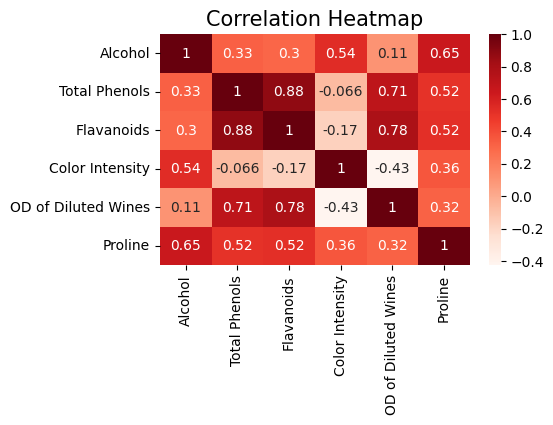

Total Phenols and Flavanoids: r = 0.8826220650937117
Total Phenols and OD of Diluted Wines: r = 0.7063719201345297
Flavanoids and OD of Diluted Wines: r = 0.7847370681277662


In [30]:
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, cmap='Reds', annot=True, annot_kws={'fontsize': 10})
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

for i, feature1 in enumerate(df[selected_features].columns):
    for j, feature2 in enumerate(df[selected_features].columns):
        if i < j:  # Avoid duplicate pairs and self-correlation
            correlation = df[feature1].corr(df[feature2])
            if correlation > 0.7:
                print(f'{feature1} and {feature2}: r = {correlation}')


**We created another heatmap to visualize the correlation between the selected features. We are mostly interested in analyzing the relationship between features that are strongly correlated with one another. If the correlation coefficient is greater than 0.7, the for loop outputs the pairs of features that are highly correlated with each other along with its correlation coefficient.**

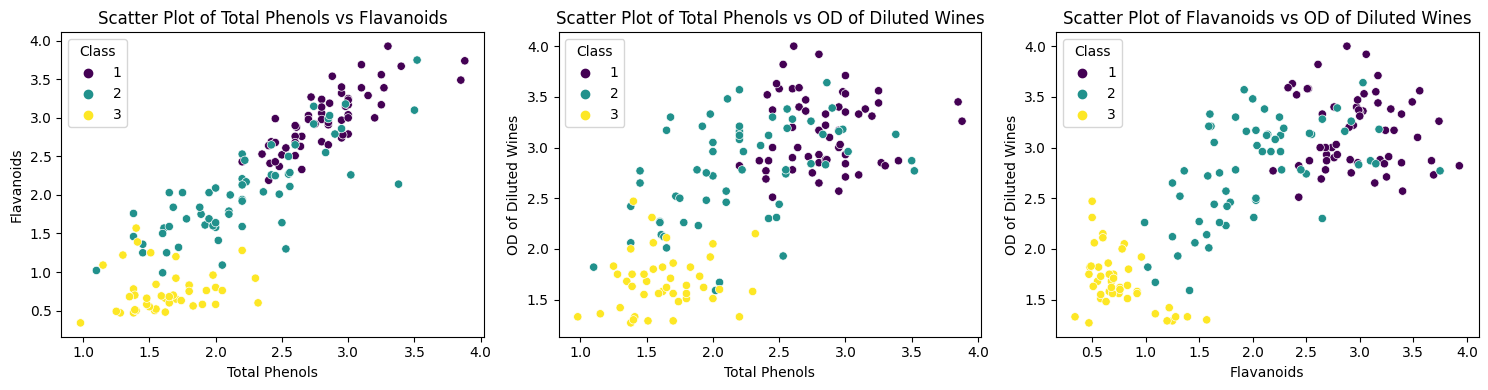

In [31]:
# Define the feature pairs for Scatter Plots
feature_pairs = [
    ('Total Phenols', 'Flavanoids'),
    ('Total Phenols', 'OD of Diluted Wines'),
    ('Flavanoids', 'OD of Diluted Wines')
]

# Create subplots
fig, axes = plt.subplots(1, len(feature_pairs), figsize=(15, 4))

# Create scatter plots for each feature pair
for i, (feature1, feature2) in enumerate(feature_pairs):
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='Class', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature1} vs {feature2}')
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)
    axes[i].legend(title='Class')

plt.tight_layout()
plt.show()

**We created scatterplots to visualize the relationships of the features that are highly correlated with each other.  Each scatter plot point is color-coded by the `'Class'` column to understand how different classes are distributed in the feature space.**

**For each scatter plot...**
* **Lower levels of each feature are associated with Class 3.**

 * **ie. lower amounts of Flavanoids and Total Phenols are associated with Class 3**

* **Medium levels of each feature are associated with Class 2.**

 * **ie. medium amounts of OD of Diluted Wines and Total Phenols are associated with Class 2**

* **Higher levels of each feature are associated with Class 1.**

 * **ie. higher amounts of OD of Diluted Wines and Flavanoids are associated with Class 1**


**This gives us insight that there is a pattern with the composition of the wine and the origin of the wine.**

### TensorFlow Data Validation (TFDV)

In [32]:
statistics = tfdv.generate_statistics_from_dataframe(df[selected_features])
tfdv.visualize_statistics(statistics)

**The `tfdv.generate_statistics_from_dataframe` module from TensorFlow generates statistics from our training data. It shows the summary statistics about the wine data, such as the count, mean, standard deviation, minimum, maximum, median, and the distribution of each feature using historgrams.**

**This visualization is helpful for indentiying anomalies, imbalances, or other issues from our data.**

**TFDV can also create logarithmic-scale histograms for better visualization. On the logarithmic scale, features compressed vertically for clearer visualization and so that the distribution appears smoother.**

In [33]:
schema = tfdv.infer_schema(statistics)
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Alcohol',FLOAT,required,,-
'Total Phenols',FLOAT,required,,-
'Flavanoids',FLOAT,required,,-
'Color Intensity',FLOAT,required,,-
'OD of Diluted Wines',FLOAT,required,,-
'Proline',INT,required,,-
'__index_level_0__',INT,required,,-


**Valency (the number of unique elements) and Domain (the subject area or field of knowledge relevant to the data) are empty mainly because the data contains no categorial features.**

In [34]:
anomalies = tfdv.validate_statistics(statistics, schema)
tfdv.display_anomalies(anomalies)

## Part B: Building a Deep Learning model using the Sequential Neural Network Classification Model
* creating and compiling sequential neural network
* plotting loss curve and accuracy curve
* providing confusion matrix and classification report

In [35]:
#Spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

**We use the `train_test_split` module from `sklearn.model_selection` to create an 80/20 train-test split for training and evaluating our deep learning model.**

In [36]:
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [37]:
#Creating a classification network model using Sequential for three classes for wine dataset

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                210       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 893 (3.49 KB)
Trainable params: 893 (3.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**We train the model using the Sequential Neural Network Classification Model. The Sequential model creates a linear stack of layers for the neural network model, and layers are added one by one in sequence. The input shape is `x_train.shape[1]`, which is 6.**

**The `model.summary()` method provides information about the type of layers, their output shapes, and the number of parameters. The model has a total of 893 trainable parameters.**

**The first hidden layer contains 30 neurons and the second hidden layer contains 20 neurons. Our output layer has 3 units, which represents that we have 3 possible outputs. The final output is determined by the `'softmax'` activation function, which is mainly used for multiclass classification.**

**The activation function `'relu'` is used in the hidden layers.**

**The optimization parameter 'adam' is the algorithm we used to update the model's weights during training.**

**The loss function we selected is `'sparse_categorical_crossentropy'` since we are working with a multiclass classification problem with our target variable labeled as 0, 1, 2.**

**Once we compile the model, we create the variable `history` to fit the model. We set `epochs=500` to specify the number of times the entire dataset is processed by the model during training. We also include our test data into the `validation_data` parameter to see how well our model performs on unseen data.**

In [38]:
#Training the model
history = model.fit(x_train, y_train_adjusted, epochs=500, validation_data=(x_test, y_test_adjusted))

Epoch 1/500
4/4 [==============================] - 3s 173ms/step - loss: 93.4070 - accuracy: 0.2812 - val_loss: 91.9355 - val_accuracy: 0.2121
Epoch 2/500
4/4 [==============================] - 0s 31ms/step - loss: 66.4037 - accuracy: 0.2812 - val_loss: 71.0707 - val_accuracy: 0.3939
Epoch 3/500
4/4 [==============================] - 0s 27ms/step - loss: 55.8665 - accuracy: 0.3750 - val_loss: 58.9010 - val_accuracy: 0.3939
Epoch 4/500
4/4 [==============================] - 0s 25ms/step - loss: 43.9293 - accuracy: 0.3750 - val_loss: 41.3180 - val_accuracy: 0.3939
Epoch 5/500
4/4 [==============================] - 0s 30ms/step - loss: 28.9288 - accuracy: 0.2734 - val_loss: 26.8600 - val_accuracy: 0.2121
Epoch 6/500
4/4 [==============================] - 0s 26ms/step - loss: 18.2530 - accuracy: 0.2812 - val_loss: 14.2505 - val_accuracy: 0.2121
Epoch 7/500
4/4 [==============================] - 0s 24ms/step - loss: 7.4004 - accuracy: 0.1953 - val_loss: 1.5319 - val_accuracy: 0.3939
Epoch 8

In [39]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_adjusted)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

2/2 [==============================] - 0s 7ms/step - loss: 0.2599 - accuracy: 0.9091
Test Loss: 0.2599, Test Accuracy: 0.9091


**After training the model and applying the validation data, we got a test accuracy of 0.9091**

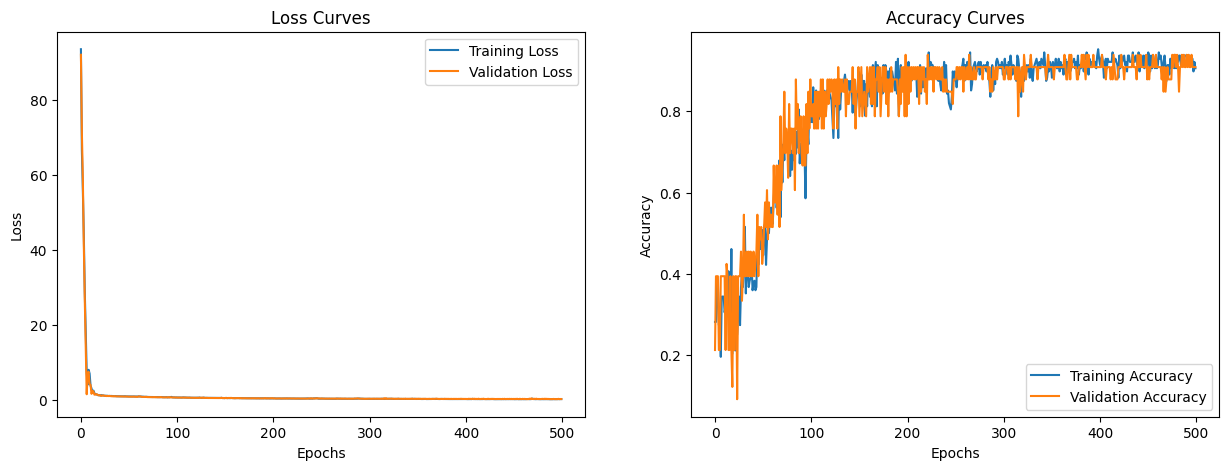

In [40]:
# Extract loss and accuracy from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss curves
ax1.plot(loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Loss Curves')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy curves
ax2.plot(accuracy, label='Training Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Accuracy Curves')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

**The two graphs above show the loss and accuracy curves of our training data and validation data. When observing the curves, we can visually see that we have a good fit, meaning the model is not overfitting nor underfitting.
In the loss curve, training loss and validation loss decrease together close to 0 over the iterations as our model is training over and over with the epoch = 500.**

**In the accuracy curve, the training accuracy and validation accuracy are increasing over the iterations. The curve jumps up and down mainly because we have a small dataset of 161 instances, with 33 of those instances belonging to the validation data. In addition, the validation loss towards the end of the curve is almost equal to the training loss, which shows that the model generalizes well.**


2/2 [==============================] - 0s 7ms/step


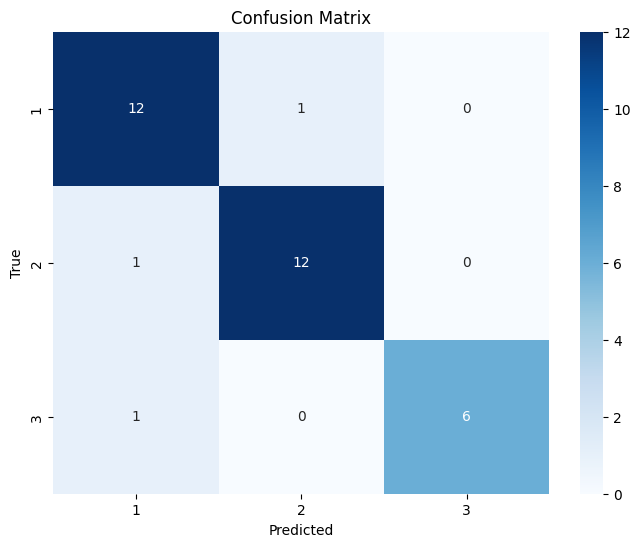

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.92      0.92      0.92        13
           2       1.00      0.86      0.92         7

    accuracy                           0.91        33
   macro avg       0.93      0.90      0.91        33
weighted avg       0.91      0.91      0.91        33



In [41]:
# Make predictions using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_adjusted)

# Create a confusion matrix
cm = confusion_matrix(y_test_adjusted, y_pred_classes)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Class'].unique(), yticklabels=df['Class'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
print("Classification Report:")
print(classification_report(y_test_adjusted, y_pred_classes))

**The confusion matrix above shows the amount of observations were predicted correctly and the amount of observations that were predicted inaccurately. The vertical axis represents the Actual Class while the horizontal axis represents the Predicted Class.**

**The classification report summarizes the performance of the classification model. It provides precision, recall, and F1-score metrics for each class (0, 1, 2) along with support counts.**

* **1 observation is inaccurately classified in Class 2 when the actual class is Class 1, which is indicated in recall=0.92 in the first row of the Classification Report.**
* **1 observation is inaccurately classified in Class 1 when the actual class is Class 2, which is indicated in recall=0.92 in the second row of the Classification Report.**
* **1 observation is inaccurately classified in Class 1 when the actual class is Class 3, which is indicated in recall=0.86 in the third row of the Classification Report**

**The accuracy of the model is 91%, and macro and weighted averages for precision, recall, and F1-score are around 91%, indicating a well-balanced performance across the classes.**

## Part C: Tuning Parameters


**1. Define the Model-building Function:**

 * The `build_sequential_model` function is defined to recreate the sequential neural network that includes tunable hyperparameters such as the activation functions and learning rates.





In [42]:
# Define the model-building function
def build_sequential_model(hp):
    model = Sequential()

    # Use the hyperparameters in building the layers
    model.add(Dense(units=30,
                    activation=hp.Choice('activation_1', values=['relu', 'sigmoid']),
                    input_shape=(x_train.shape[1],)))

    model.add(Dense(units=20,
                    activation=hp.Choice('activation_2', values=['relu', 'sigmoid'])))

    model.add(Dense(3, activation='softmax'))

    # Define the learning rate hyperparameter
    learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001])

    # Compile the model with the specified learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model  # Return only the model

# Create a tuner
tuner = GridSearch(
    build_sequential_model,
    objective='val_accuracy',
    directory='my_dir',
    project_name='my_project'
)

tuner.search_space_summary()

Search space summary
Default search space size: 3
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


**2. Create a Tuner:**
 * A `GridSearch` tuner is created to search for the best hyperparameters. It tests all the different combinations for the hidden layer activation functions ‘relu’ and ’sigmoid’ with the learning rates 0.1, 0.01, and 0.001.

**3. Search and Retrieve Best Hyperparameters:**
 * The for loop is created to evaluate the parameters on different values of epochs stored in epochs_values = [500, 1000, 2000]

 * The tuner is used to search for the best hyperparameters by training and evaluating the model on the provided training and test data for each value of epochs. The best hyperparameters are obtained from the tuner results using the method tuner.get_best_hyperparameters using the results from tuner.search, and the model is fitted with the best hyperparmeters and given epoch value and stored in the 'best_models' variable

 * The `best_models` variable will be used to show the optimal parameters and test accuracy in the next cell.

In [43]:
epochs_values = [500, 1000, 2000]

best_models = []

for epochs in epochs_values:
    # Search for the best hyperparameters
    tuner.search(x_train, y_train_adjusted, validation_data=(x_test, y_test_adjusted), epochs=epochs)

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the best hyperparameters
    best_model = build_sequential_model(best_hps)
    best_model.fit(x_train, y_train_adjusted, epochs=epochs, validation_data=(x_test, y_test_adjusted))

    # Save the best model for each epoch
    best_models.append(best_model)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 17ms/step - loss: 0.1183 - accuracy: 0.9609 - val_loss: 0.1552 - val_accuracy: 0.9697
Epoch 502/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.1207 - accuracy: 0.9453 - val_loss: 0.1363 - val_accuracy: 0.9697
Epoch 503/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1250 - accuracy: 0.9531 - val_loss: 0.1523 - val_accuracy: 0.9697
Epoch 504/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1308 - accuracy: 0.9375 - val_loss: 0.1422 - val_accuracy: 0.9697
Epoch 505/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1429 - accuracy: 0.9453 - val_loss: 0.1522 - val_accuracy: 0.9697
Epoch 506/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.1228 - accuracy: 0.9375 - val_loss: 0.1308 - val_accuracy: 0.9394
Epoch 507/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1126 - accuracy: 0.9453 - val

In [44]:
# Evaluate the best models on the test set
for i, epochs in enumerate(epochs_values):
    _, best_accuracy = best_models[i].evaluate(x_test, y_test_adjusted)

    # Print the information for the current epoch
    print(f"For {epochs} epochs:\n"
          f"Best Hyperparameters:\n"
          f"  1st Hidden Layer Activation Function: {best_hps.get('activation_1')}\n"
          f"  2nd Hidden Layer Activation Function: {best_hps.get('activation_2')}\n"
          f"  Learning Rate: {best_hps.get('learning_rate')}\n"
          f"Test Accuracy: {best_accuracy}\n\n")

2/2 [==============================] - 0s 10ms/step - loss: 0.1260 - accuracy: 0.9697
For 500 epochs:
Best Hyperparameters:
  1st Hidden Layer Activation Function: relu
  2nd Hidden Layer Activation Function: relu
  Learning Rate: 0.01
Test Accuracy: 0.9696969985961914


2/2 [==============================] - 0s 8ms/step - loss: 0.1251 - accuracy: 0.9394
For 1000 epochs:
Best Hyperparameters:
  1st Hidden Layer Activation Function: relu
  2nd Hidden Layer Activation Function: relu
  Learning Rate: 0.01
Test Accuracy: 0.939393937587738


2/2 [==============================] - 0s 10ms/step - loss: 0.2614 - accuracy: 0.9697
For 2000 epochs:
Best Hyperparameters:
  1st Hidden Layer Activation Function: relu
  2nd Hidden Layer Activation Function: relu
  Learning Rate: 0.01
Test Accuracy: 0.9696969985961914




**Overall, test accuracy is at its highest when epochs=500 and when epochs=2000. The model's performance slightly decreases at epochs=1000.**

**The optimal activation function for both hidden layers is relu, and optimal learning rate is 0.01.**

**Training the model at 500 epochs gives a good balance between training the model sufficiently and generalizing the data well while being computationally less expensive.**